In [1]:
# import packages

# Basics
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Graphs
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessing; model selection and evaluation
from sklearn import pipeline, preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# text handling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm

# for custom countvectorizer with SpaCy lemmatization
import spacy
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, VectorizerMixin
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import csr_matrix

# WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

------
If we need to move virtual ENV to use Tensorflow we will need to install:

1. spacy

<code> conda install -c spacy spacy </code>

2. 'en_core_web_md' (maybe?)

<code> python -m spacy download en_core_web_md </code>

3. wordcloud (maybe?)

&emsp;Google wordcloud anaconda

------

In [2]:
# import packages
data = pd.read_csv("saved_csv/df.csv")
data.drop(columns = "Unnamed: 0",inplace=True)

df = data.copy()

### Setting up data for analysis
------

In [3]:
# putting questions into categories

current_mh_coverage = ["Does your employer provide mental health benefits as part of healthcare coverage?",
               "Do you know the options for mental health care available under your employer-provided health coverage?",
               "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
               "Does your employer offer resources to learn more about mental health disorders and options for seeking help?",
               "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
               "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?"]

previous_mh_coverage = ["Have your previous employers provided mental health benefits?",
                        "Were you aware of the options for mental health care provided by your previous employers?",
                        "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
                        "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?",
                        "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"]

mh_status = ["Do you currently have a mental health disorder?",
             "Have you ever been diagnosed with a mental health disorder?",'Anxiety Disorder', 'Mood Disorder', 
             'Psychotic Disorder','Eating Disorder', 'Neurodevelopmental Disorders','Personality Disorder', 
             'Obsessive-Compulsive Disorder','Post-Traumatic Stress Disorder', 'Dissociative Disorder',
             'Substance-Related and Addictive Disorders', 'Other','Adjustment disorder',
             "Have you had a mental health disorder in the past?",
             "Have you ever sought treatment for a mental health disorder from a mental health professional?",
             "Do you have a family history of mental illness?",
             "How willing would you be to share with friends and family that you have a mental illness?",
             "Would you be willing to bring up a physical health issue with a potential employer in an interview?"]

witnessed_exp = ["Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?",
                 "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
                 "Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?"]

ratings = df.columns[df.columns.str.contains("Overall")]

demographics = ["What is your age?","What is your gender?","What country do you live in?",
                "What US state or territory do you live in?","What is your race?"]

comfort_talking_current = ["Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
                           "Have you ever discussed your mental health with your employer?",
                           "Would you feel comfortable discussing a mental health issue with your coworkers?",
                           "Have you ever discussed your mental health with coworkers?",
                           "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                           "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
                           "Would you bring up your mental health with a potential employer in an interview?",
                           "Are you openly identified at work as a person with a mental health issue?"]

comfort_talking_previous = ["Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?",
                            "Would you have been willing to discuss your mental health with your direct supervisor(s)?",
                            "Did you ever discuss your mental health with your previous employer?",
                            "Would you have been willing to discuss your mental health with your coworkers at previous employers?",
                            "Did you ever discuss your mental health with a previous coworker(s)?",
                            "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                            "Would you bring up your mental health with a potential employer in an interview?",
                            "Are you openly identified at work as a person with a mental health issue?"]

comfort_dependent_var = ["Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?",
                           "Have you ever discussed your mental health with your employer?",
                           "Would you feel comfortable discussing a mental health issue with your coworkers?",
                           "Have you ever discussed your mental health with coworkers?",
                           "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                           "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?",
                           "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?",
                           "Would you have been willing to discuss your mental health with your direct supervisor(s)?",
                           "Did you ever discuss your mental health with your previous employer?",
                           "Would you have been willing to discuss your mental health with your coworkers at previous employers?",
                           "Did you ever discuss your mental health with a previous coworker(s)?",
                           "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                           "Would you bring up your mental health with a potential employer in an interview?",
                           "Are you openly identified at work as a person with a mental health issue?"]

categories = [current_mh_coverage,previous_mh_coverage,mh_status,witnessed_exp,ratings,comfort_talking_current,comfort_talking_previous,comfort_dependent_var]

### Preparing the data
------

#### Independent Variables for Q1
------

In [4]:
def make_dummies(question,columns_to_keep = 1):
    
    dummies = pd.get_dummies(df_2.loc[:,question])
    for j in range(len(dummies.columns)):
        name = question + "__" + dummies.columns[j]
        dummies.rename(columns = {dummies.columns[j] : name},inplace=True)

    result = dummies.iloc[:,[columns_to_keep]]
    
    return result

In [5]:
# making a copy
df_2 = df.copy()

In [6]:
# preparing a table of independent variables for Q1
independent_var = [current_mh_coverage,previous_mh_coverage,witnessed_exp,mh_status,ratings]
dependent_var = [comfort_talking_current,comfort_talking_previous]

In [7]:
# set up 2 dataframes for concatenating data
omitted = pd.DataFrame(columns = ["Question","Answer"])
final = pd.DataFrame()

In [8]:
# current_mh_coverage
for i in [0,2,3]:
    result = make_dummies(current_mh_coverage[i],-1)
    final = pd.concat([final,result],axis = 1)

for i in [2,-2,-1]:
    result = make_dummies(current_mh_coverage[5],i)
    final = pd.concat([final,result],axis = 1)

In [10]:
# witnessed_exp

result = make_dummies(witnessed_exp[0],-1)
final = pd.concat([final,result],axis = 1)

In [11]:
# mh_status
to_dummy = []
for i in [0,1,-5,-3,-1]:
    to_dummy.append(mh_status[i])
    
df_2.loc[:,to_dummy[0]][df_2.loc[:,to_dummy[0]]=="Possibly"]="Don't Know"

df_2.loc[:,to_dummy[2]][df_2.loc[:,to_dummy[2]]=="Possibly"]="Don't Know"
df_2.loc[:,to_dummy[2]][df_2.loc[:,to_dummy[2]]=="-1"]="Don't Know"

In [12]:
# mh_status
result = make_dummies(to_dummy[0],-1)
final = pd.concat([final,result],axis = 1)

for i in [2,3,4,5,6,7,8,9,10,11,12,13,15,17]:
    final = pd.concat([final,df_2.loc[:,mh_status[i]]],axis = 1)

In [13]:
# ratings
for i in [1,4]:
    final = pd.concat([final,df_2.loc[:,ratings[i]]],axis = 1)

In [14]:
independent_q1 = final

In [15]:
independent_q1.head()

,Does your employer provide mental health benefits as part of healthcare coverage?__Yes,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?__Yes",Does your employer offer resources to learn more about mental health disorders and options for seeking help?__Yes,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Neither easy nor difficult","If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Somewhat easy","If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Very easy",Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?__Yes,Do you currently have a mental health disorder?__Yes,Anxiety Disorder,Mood Disorder,Psychotic Disorder,Eating Disorder,Neurodevelopmental Disorders,Personality Disorder,Obsessive-Compulsive Disorder,Post-Traumatic Stress Disorder,Dissociative Disorder,Substance-Related and Addictive Disorders,Other,Adjustment disorder,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,"Overall, how much importance does your employer place on mental health?","Overall, how well do you think the tech industry supports employees with mental health issues?"
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,0.0,1.0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,2.0,2.0
2,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,5,1.0,1.0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,10,5.0,2.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,5.0,1.0


#### Dependent Variables for Q1
------

In [16]:
# creating a table of dependent variables
dependent = df.loc[:,comfort_dependent_var]

In [17]:
num_list = [0,2,5,6,7,9,12]
columns_to_join = [1,3,4,8,10,11,13]

final_dep = pd.get_dummies(dependent.iloc[:,num_list])

for i in columns_to_join:
    result = pd.get_dummies(dependent.iloc[:,i])
    final_dep = pd.concat([final_dep,result],axis=1)

In [18]:
final_dep.head()

,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_Maybe,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_No,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_Not Applicable,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_Yes,Would you feel comfortable discussing a mental health issue with your coworkers?_Maybe,Would you feel comfortable discussing a mental health issue with your coworkers?_No,Would you feel comfortable discussing a mental health issue with your coworkers?_Not Applicable,Would you feel comfortable discussing a mental health issue with your coworkers?_Yes,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Mental health,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Not Applicable,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Physical health,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Same level of comfort for each,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Did not answer,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Mental health,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Physical health,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Same level of comfort for each,Would you have been willing to discuss your mental health with your direct supervisor(s)?_Did not answer,Would you have been willing to discuss your mental health with your direct supervisor(s)?_I don't know,"Would you have been willing to discuss your mental health with your direct supervisor(s)?_No, none of my previous supervisors",Would you have been willing to discuss your mental health with your direct supervisor(s)?_Some of my previous supervisors,"Would you have been willing to discuss your mental health with your direct supervisor(s)?_Yes, all of my previous supervisors",Would you have been willing to discuss your mental health with your coworkers at previous employers?_Did not answer,"Would you have been willing to discuss your mental health with your coworkers at previous employers?_No, at none of my previous employers",Would you have been willing to discuss your mental health with your coworkers at previous employers?_Some of my previous employers,"Would you have been willing to discuss your mental health with your coworkers at previous employers?_Yes, at all of my previous employers",Would you bring up your mental health with a potential employer in an interview?_Maybe,Would you bring up your mental health with a potential employer in an interview?_No,Would you bring up your mental health with a potential employer in an interview?_Yes,-1.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,1.0
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0


#### Predicting classes
------

Models Used:

- KMeans Clustering

In [20]:
# KMeans Clustering
X_alt = final_dep

k_means_model = KMeans(n_clusters = 4)
k_means_model.fit(X_alt)

y_pred2_alt = k_means_model.predict(X_alt)

b_alt = pd.DataFrame(y_pred2_alt)
b_alt[0].groupby(b_alt[0]).count()

0
0    143
1    490
2    386
3    154
Name: 0, dtype: int64

In [23]:
b_alt.rename(columns = {0 : "Classes"},inplace=True)

In [24]:
#b_alt.to_csv("saved_csv/q1_dependent_alt.csv")

Since there is a factor of randomness in KMeans Clustering, the code will generate different counts with each iteration. Since the goal is to generate a cluster of 4 classes with an approximately normal distribution, the following cluster count will be used for the analysis:

|Class|Count|
|------|------|
|0|143|
|1|490|
|2|386|
|3|154|

### Q1 - Factors that affect comfort level in discussing MH at workplace
------

In [25]:
def make_dummies_q(question,num,drop_pattern = 1):
    '''
    This function creates dummy variable for text responses.
    It also creates a table of answers that are omitted in the table in preparation for analysis,
        since n-1 answer for each question is needed to avoid multicollinearity.
        
    Returns:
    -------
    question_omitted: a table with question and the answer that has been omitted to avoid multicollinearity.
    result: a table of dummy variables.
    '''
    d = {}
    question_omitted = pd.DataFrame(columns = ["Question","Answer"])
    result = pd.DataFrame()

    d[num] = pd.get_dummies(df_2.loc[:,question])
    if drop_pattern == 1:
        question_omitted = question_omitted.append({"Question":question, "Answer": d[num].columns[-2]},ignore_index = True)
        d[num].drop(columns = d[num].columns[0],inplace = True)
    elif drop_pattern == 2:
        question_omitted = question_omitted.append({"Question":question, "Answer": d[num].columns[3]},ignore_index = True)
        d[num].drop(columns = d[num].columns[3],inplace = True)

    for i in range(len(d[num].columns)):
        name = question + "__" + d[num].columns[i]
        d[num].rename(columns = {d[num].columns[i] : name},inplace=True)

    result = pd.concat([result,d[num]],axis=1)
        
    return question_omitted,result

In [26]:
# grabbing the dependent variables
dependent_class = pd.read_csv("saved_csv/q1_dependent_alt.csv")
dependent_class.drop('Unnamed: 0',axis=1,inplace=True)
#dependent_class

In [27]:
# What is your gender?
question_omitted,gender = make_dummies_q(df_2.columns[-7],-7,drop_pattern = 2)

In [28]:
# Grouping countries into 5 continents
country_names = df_2.iloc[:,-6].groupby(df_2.iloc[:,-6]).count().index

df_2["countries_continent"] = df_2.iloc[:,-6]

north_am = [8,34,55]
south_am = [0,6,9,56]
asia = [3,20,23,24,26,28,29,39,43,44,46]
africa = [14,30,33,37,48]
europe = [2,4,5,7,10,11,13,15,16,17,18,19,21,22,25,27,31,32,35,38,40,41,42,45,47,49,50,51,52,53,54]
oceania = [1,36]
did_not_answer = [12]

continents = [north_am,south_am,asia,africa,europe,oceania,did_not_answer]
names = ["North America", "South America", "Asia", "Africa", "Europe", "Oceania", "Did not answer"]

for position,continent in enumerate(continents):
    for num in np.flip(continent):
        df_2.loc[:,"countries_continent"][df_2.loc[:,"countries_continent"]== country_names[num]]=names[position]

In [29]:
countries = df_2.iloc[:,-1]

In [30]:
countries = pd.get_dummies(countries)
countries.drop(columns = "North America", inplace=True)

In [31]:
# What is your race?
races = pd.get_dummies(df_2.iloc[:,-5])
races.drop(columns = "Caucasian", inplace=True)

In [32]:
independent_q1_alt = pd.concat([independent_q1,gender,countries,races,df.iloc[:,-8]],axis=1)

In [33]:
# p-value WITHOUT DEMOGRAPHICS

X_1 = independent_q1
Y_1 = dependent_class/3

scaler = preprocessing.StandardScaler()
scaler.fit(X_1)
X_transformed_1 = scaler.transform(X_1)

X_transformed_1 = np.hstack([np.ones([X_transformed_1.shape[0],1]), X_transformed_1])

logit = sm.Logit(Y_1, X_transformed_1)
fitted_model_1 = logit.fit()
fitted_model_1.summary()

# alpha = 0.05

Optimization terminated successfully.
         Current function value: 0.649265
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Classes   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1148
Method:                           MLE   Df Model:                           24
Date:                Wed, 20 Mar 2019   Pseudo R-squ.:                 0.06249
Time:                        16:20:57   Log-Likelihood:                -761.59
converged:                       True   LL-Null:                       -812.35
                                        LLR p-value:                 1.648e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0430      0.060     -0.717      0.473      -0.161       0.075
x1            -0.1578      0.071     -2.232      0.026      -0.296      -0.019
x2            -0.0678      0.077     -0.878      0.380      -0.219       0.084
x3            -0.0678      0.079     -0.854      0.393      -0.223       0.088
x4            -0.1575      0.065     -2.440      0.015      -0.284      -0.031
x5            -0.1699      0.068     -2.494      0.013      -0.303      -0.036
x6            -0.1454      0.069     -2.094      0.036      -0.281      -0.009
x7             0.0277      0.062      0.444      0.657      -0.094       0.150
x8             0.0301      0.088      0.344      0.731      -0.142       0.202
x9            -0.0117      0.072     -0.163      0.871      -0.153       0.129
x10           -0.0059      0.076     -0.078      0.938      -0.154       0.143
x11            0.0098      0.061      0.161      0.872      -0.109       0.129
x12           -0.0510      0.063     -0.811      0.417      -0.174       0.072
x13           -0.0430      0.064     -0.674      0.501      -0.168       0.082
x14           -0.0898      0.063     -1.417      0.157      -0.214       0.034
x15           -0.0331      0.063     -0.526      0.599      -0.156       0.090
x16            0.0146      0.064      0.227      0.820      -0.112       0.141
x17            0.0263      0.064      0.412      0.680      -0.099       0.151
x18            0.0722      0.062      1.157      0.247      -0.050       0.195
x19            0.0510      0.067      0.758      0.449      -0.081       0.183
x20            0.0255      0.063      0.406      0.685      -0.098       0.149
x21            0.2023      0.082      2.469      0.014       0.042       0.363
x22            0.1183      0.066      1.800      0.072      -0.011       0.247
x23            0.3046      0.070      4.334      0.000       0.167       0.442
x24           -0.0682      0.067     -1.019      0.308      -0.199       0.063
==============================================================================
"""

In [34]:
# p-value WITH DEMOGRAPHICS

X_1 = independent_q1_alt
Y_1 = dependent_class/3

scaler = preprocessing.StandardScaler()
scaler.fit(X_1)
X_transformed_1 = scaler.transform(X_1)

X_transformed_1 = np.hstack([np.ones([X_transformed_1.shape[0],1]), X_transformed_1])

logit = sm.Logit(Y_1, X_transformed_1)
fitted_model_demo = logit.fit()
fitted_model_demo.summary()

# alpha = 0.05
# all features together are significant
# Columns that are significant: 0,3,4,20,22,46

         Current function value: 0.638463
         Iterations: 35


/Users/nattiechan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Classes   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1125
Method:                           MLE   Df Model:                           47
Date:                Wed, 20 Mar 2019   Pseudo R-squ.:                 0.07809
Time:                        16:20:57   Log-Likelihood:                -748.92
converged:                      False   LL-Null:                       -812.35
                                        LLR p-value:                 2.876e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0197    653.610  -3.02e-05      1.000   -1281.071    1281.032
x1            -0.1744      0.077     -2.279      0.023      -0.324      -0.024
x2            -0.0802      0.079     -1.021      0.307      -0.234       0.074
x3            -0.0688      0.080     -0.856      0.392      -0.226       0.089
x4            -0.1456      0.065     -2.225      0.026      -0.274      -0.017
x5            -0.1529      0.069     -2.200      0.028      -0.289      -0.017
x6            -0.1291      0.071     -1.824      0.068      -0.268       0.010
x7             0.0306      0.064      0.479      0.632      -0.095       0.156
x8             0.0429      0.089      0.483      0.629      -0.131       0.217
x9             0.0024      0.074      0.033      0.974      -0.142       0.147
x10           -0.0009      0.077     -0.012      0.990      -0.151       0.149
x11            0.0095      0.061      0.155      0.877      -0.110       0.129
x12           -0.0378      0.064     -0.593      0.553      -0.163       0.087
x13           -0.0328      0.066     -0.496      0.620      -0.162       0.097
x14           -0.0863      0.064     -1.338      0.181      -0.213       0.040
x15           -0.0137      0.064     -0.214      0.831      -0.139       0.112
x16            0.0182      0.066      0.274      0.784      -0.112       0.148
x17            0.0263      0.065      0.407      0.684      -0.100       0.153
x18            0.0637      0.063      1.012      0.312      -0.060       0.187
x19            0.0459      0.067      0.682      0.495      -0.086       0.178
x20            0.0238      0.064      0.371      0.711      -0.102       0.150
x21            0.1691      0.084      2.011      0.044       0.004       0.334
x22            0.1248      0.067      1.867      0.062      -0.006       0.256
x23            0.2867      0.072      3.972      0.000       0.145       0.428
x24           -0.0415      0.069     -0.605      0.545      -0.176       0.093
x25            0.0488      0.069      0.712      0.477      -0.086       0.183
x26            0.0069      0.066      0.104      0.917      -0.123       0.137
x27            0.0128      0.062      0.207      0.836      -0.109       0.134
x28           -0.0468      0.067     -0.697      0.486      -0.179       0.085
x29            0.0071      0.061      0.117      0.907      -0.112       0.126
x30           -0.0621      0.069     -0.896      0.370      -0.198       0.074
x31           -0.0253      0.077     -0.329      0.742      -0.176       0.126
x32            0.7419   1.54e+04   4.81e-05      1.000   -3.02e+04    3.02e+04
x33           -0.0129      0.121     -0.106      0.915      -0.250       0.224
x34            0.0570      0.074      0.774      0.439      -0.087       0.201
x35            0.0641      0.067      0.957      0.339      -0.067       0.195
x36            0.0164      0.061      0.267      0.790      -0.104       0.137
x37            0.0094      0.062      0.151      0.880      -0.113       0.132
x3

In [35]:
# Create a list of questions that are statistically significant
num_list = [0,3,4,20,22,46]
q1_ind_sig = independent_q1_alt.iloc[:,num_list]

In [36]:
# Creating a model using the questions that are statistically significant
X_train, X_test, y_train, y_test = train_test_split(q1_ind_sig,dependent_class,test_size = 0.2)

estimators = [("normalize", preprocessing.StandardScaler()),
             ("model",LogisticRegression())]

pipe = pipeline.Pipeline(estimators)

param_grid = [{"model":[XGBClassifier()], 
               "normalize": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None]},
              {"model": [RandomForestClassifier()],
               "normalize": [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), None]}]

grid = GridSearchCV(pipe, param_grid, cv=5)
fitted_grid_1 = grid.fit(X_train,y_train)

In [37]:
fitted_grid_1.best_estimator_

Pipeline(memory=None,
     steps=[('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [38]:
fitted_grid_1.best_score_

0.5319829424307037

In [39]:
fitted_grid_1.score(X_test,y_test)

0.5574468085106383

In [40]:
# Ranking of factors that are important for predicting comfort level, from most to least important
indices = np.flip(fitted_grid_1.best_estimator_.named_steps["model"].feature_importances_.argsort())

q1_ind_sig.columns[indices]

Index(['What is your age?',
       'Overall, how much importance does your employer place on mental health?',
       'Does your employer provide mental health benefits as part of healthcare coverage?__Yes',
       'Have you ever sought treatment for a mental health disorder from a mental health professional?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Somewhat easy',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?__Neither easy nor difficult'],
      dtype='object')

### Q2 Qualitative insights for the tech industry to improve MH support for employees
------

**NB: Industry rating is 0-4 for some reason!!!**

In [41]:
# Grabbing the responses as independent variables
corpus = df.iloc[:,-9]

In [42]:
# dependent variables -> ratings
industry_rating = df.iloc[:,-10]

In [43]:
# make the ratings from 1-5 to 0-4
industry_rating = industry_rating - 1

In [44]:
table_q4 = pd.concat([corpus,industry_rating,dependent_class],axis=1)

In [45]:
# dropping columns that did not answer the question
index = table_q4[table_q4.iloc[:,0]=="Did not answer"].index

table_q4.drop(index,axis=0,inplace=True)

In [46]:
# Code source: https://github.com/mpavlovic/spacy-vectorizers
# create a custom countvectorizer with SpaCy lemmatization

class SpacyPipeInitializer(object):
    def __init__(self, nlp, join_str=" ", batch_size=10000, n_threads=2):
        self.nlp = nlp
        self.join_str = join_str
        self.batch_size = batch_size
        self.n_threads = n_threads
        
class SpacyPipeProcessor(SpacyPipeInitializer):
    def __init__(self, nlp, multi_iters=False, join_str=" ", batch_size=10000, n_threads=2):
        super(SpacyPipeProcessor, self).__init__(nlp, join_str, batch_size, n_threads)
        self.multi_iters = multi_iters
    
    def __call__(self, raw_documents):
        docs_generator = self.nlp.pipe(raw_documents, batch_size=self.batch_size, n_threads=self.n_threads)
        return docs_generator if self.multi_iters == False else list(docs_generator)
    
class SpacyLemmaCountVectorizer(CountVectorizer):
    
    def __init__(self, input='content', encoding='utf-8',
                 decode_error='strict', strip_accents=None,
                 lowercase=True, preprocessor=None, tokenizer=None,
                 stop_words=None, token_pattern=r"(?u)[^\r\n ]+",
                 ngram_range=(1, 1), analyzer='word',
                 max_df=1.0, min_df=1, max_features=None,
                 vocabulary=None, binary=False, dtype=np.int64, 
                 nlp=None, ignore_chars='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~', 
                 join_str=" ", use_pron=False):
        
        super().__init__(input, encoding, decode_error, strip_accents, 
                                                   lowercase, preprocessor, tokenizer,
                                                   stop_words, token_pattern, ngram_range, 
                                                   analyzer, max_df, min_df, max_features,
                                                   vocabulary, binary, dtype)
        self.ignore_chars = ignore_chars
        self.join_str = ' ' # lemmas have to be joined for splitting
        self.use_pron = use_pron
        self.translate_table = dict((ord(char), None) for char in self.ignore_chars)
        
    def lemmatize_from_docs(self, docs):
        for doc in docs:
            lemmas_gen = (token.lemma_.translate(self.translate_table) if self.use_pron or token.lemma_!='-PRON-' else token.lower_.translate(self.translate_table) for token in doc)  # generator expression
            yield self.join_str.join(lemmas_gen) if self.join_str is not None else [lemma for lemma in lemmas_gen]
    
    def build_tokenizer(self):
        return lambda doc: doc.split()
    
    def transform(self, spacy_docs):
        raw_documents = self.lemmatize_from_docs(spacy_docs)
        return super(SpacyLemmaCountVectorizer, self).transform(raw_documents)
    
    def fit_transform(self, spacy_docs, y=None):
        raw_documents = self.lemmatize_from_docs(spacy_docs)
        return super(SpacyLemmaCountVectorizer, self).fit_transform(raw_documents, y)

In [47]:
# customization stopwords to filter out some words
stopwords = set(STOPWORDS)
stopwords.update(["mental","health","issue","work",
                  "take","hour","tech","industry","people","employee"])

In [48]:
# CountVectorizer with SpaCy Lemmatization
nlp = spacy.load('en_core_web_md')

spp = SpacyPipeProcessor(nlp, n_threads=1, multi_iters=True)
spacy_docs = spp(table_q4.iloc[:,0]);

slcv = SpacyLemmaCountVectorizer(min_df=3,stop_words=stopwords, ngram_range=(1, 3), ignore_chars='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
slcv.fit(spacy_docs)
count_vectors = slcv.transform(spacy_docs); count_vectors

<789x755 sparse matrix of type '<class 'numpy.int64'>'
	with 7266 stored elements in Compressed Sparse Row format>

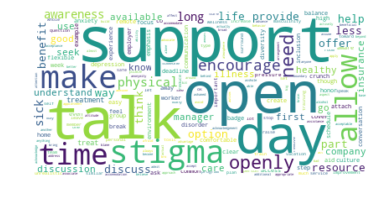

In [49]:
# Pulling out the list of parsed words and put them into a wordcloud
list_of_words = slcv.vocabulary_.keys()
list_of_words = list(list_of_words)
list_of_words.sort()

wordcloud = WordCloud(background_color="white").generate(" ".join(list_of_words))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

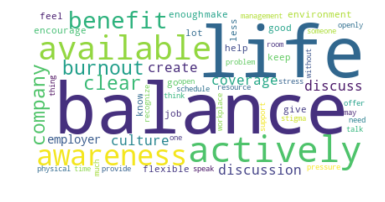

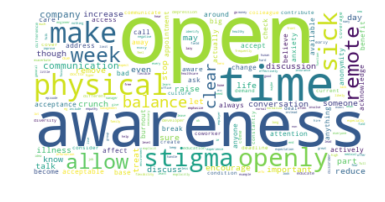

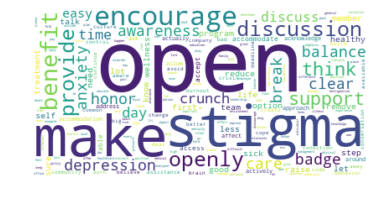

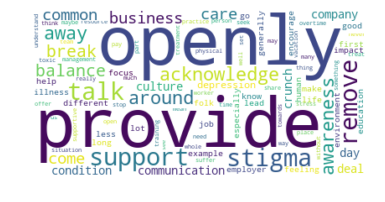

In [50]:
for num in range(4):

    table = table_q4[table_q4.iloc[:,-1]==num]

    # CountVectorizer with SpaCy Lemmatization
    spp = SpacyPipeProcessor(nlp, n_threads=1, multi_iters=True)
    spacy_docs = spp(table.iloc[:,0]);

    slcv = SpacyLemmaCountVectorizer(min_df=3,stop_words=stopwords, ngram_range=(1, 3), ignore_chars='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
    slcv.fit(spacy_docs)
    count_vectors = slcv.transform(spacy_docs); count_vectors

    # Pulling out the list of parsed words and put them into a wordcloud
    list_of_words = slcv.vocabulary_.keys()
    list_of_words = list(list_of_words)
    list_of_words.sort()

    wordcloud = WordCloud(background_color="white").generate(" ".join(list_of_words))

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show();

In [51]:
# use RNN to do something with the words?